In [1]:
import pandas as pd
import re

diabetic = pd.read_csv("./diabetes.csv")
# print(diabetic)
diabetic_headers = diabetic.columns
# print(diabetic_headers)


#read txt file seperate it by space 
pre_diabetic = pd.read_csv("./pre_diabetes.txt", sep=" ", header=None)
# print(diabetic)

pre_diabetic = pre_diabetic.drop(1, axis=1)
# print(diabetic)
# move the first column to the last column
first_column = pre_diabetic.pop(0)
pre_diabetic.insert(8,"new_column", first_column)

# print(pre_diabetic)
pre_diabetic.columns = diabetic_headers
print(pre_diabetic)




def clean_entry(entry):
    if type(entry) != str:
        return entry
    else:
        return re.sub(r'\d+:', '', entry)


# pre_diabetic = pre_diabetic.applymap(clean_entry)
# Apply 'map' to each column in the DataFrame
for column in pre_diabetic.columns:
    pre_diabetic[column] = pre_diabetic[column].map(clean_entry)
pre_diabetic = pre_diabetic.apply(pd.to_numeric)

# output the data to a csv file
pre_diabetic.to_csv("pre_diabetes.csv", index=False)
  



     Pregnancies       Glucose BloodPressure SkinThickness       Insulin  \
0     1:6.000000  2:148.000000   3:72.000000   4:35.000000    5:0.000000   
1     1:1.000000   2:85.000000   3:66.000000   4:29.000000    5:0.000000   
2     1:8.000000  2:183.000000   3:64.000000    4:0.000000    5:0.000000   
3     1:1.000000   2:89.000000   3:66.000000   4:23.000000   5:94.000000   
4     1:0.000000  2:137.000000   3:40.000000   4:35.000000  5:168.000000   
..           ...           ...           ...           ...           ...   
763  1:10.000000  2:101.000000   3:76.000000   4:48.000000  5:180.000000   
764   1:2.000000  2:122.000000   3:70.000000   4:27.000000    5:0.000000   
765   1:5.000000  2:121.000000   3:72.000000   4:23.000000  5:112.000000   
766   1:1.000000  2:126.000000   3:60.000000    4:0.000000    5:0.000000   
767   1:1.000000   2:93.000000   3:70.000000   4:31.000000    5:0.000000   

             BMI DiabetesPedigreeFunction          Age  Outcome  
0    6:33.599998     

In [25]:
import pandas as pd
diabetic = pd.read_csv("./pre_diabetes.csv")
print(diabetic)



     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      -0.294118  0.487437       0.180328      -0.292929 -1.000000  0.001490   
1      -0.882353 -0.145729       0.081967      -0.414141 -1.000000 -0.207153   
2      -0.058824  0.839196       0.049180      -1.000000 -1.000000 -0.305514   
3      -0.882353 -0.105528       0.081967      -0.535354 -0.777778 -0.162444   
4      -1.000000  0.376884      -0.344262      -0.292929 -0.602837  0.284650   
..           ...       ...            ...            ...       ...       ...   
763     0.176471  0.015075       0.245902      -0.030303 -0.574468 -0.019374   
764    -0.764706  0.226131       0.147541      -0.454545 -1.000000  0.096870   
765    -0.411765  0.216080       0.180328      -0.535354 -0.735225 -0.219076   
766    -0.882353  0.266332      -0.016393      -1.000000 -1.000000 -0.102832   
767    -0.882353 -0.065327       0.147541      -0.373737 -1.000000 -0.093890   

     DiabetesPedigreeFunction       Age

In [26]:

# standardize the data from -1 to 1 for each column other than outcome

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the first 8 columns (excluding the outcome column)
diabetic.iloc[:, 0:8] = scaler.fit_transform(diabetic.iloc[:, 0:8])

diabetic.to_csv("pre_diabetes.csv", index=False)

# Print the transformed data
print(diabetic)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      -0.294118  0.487437       0.180328      -0.292929 -1.000000  0.001490   
1      -0.882353 -0.145729       0.081967      -0.414141 -1.000000 -0.207153   
2      -0.058824  0.839196       0.049180      -1.000000 -1.000000 -0.305514   
3      -0.882353 -0.105528       0.081967      -0.535354 -0.777778 -0.162444   
4      -1.000000  0.376884      -0.344262      -0.292929 -0.602837  0.284650   
..           ...       ...            ...            ...       ...       ...   
763     0.176471  0.015075       0.245902      -0.030303 -0.574468 -0.019374   
764    -0.764706  0.226131       0.147541      -0.454545 -1.000000  0.096870   
765    -0.411765  0.216080       0.180328      -0.535354 -0.735225 -0.219076   
766    -0.882353  0.266332      -0.016393      -1.000000 -1.000000 -0.102832   
767    -0.882353 -0.065327       0.147541      -0.373737 -1.000000 -0.093890   

     DiabetesPedigreeFunction       Age

In [27]:
# check the none value in the data
print(diabetic.isnull().sum())

# check the data type of the data
print(diabetic.dtypes)



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object


# plot distribution for each column 

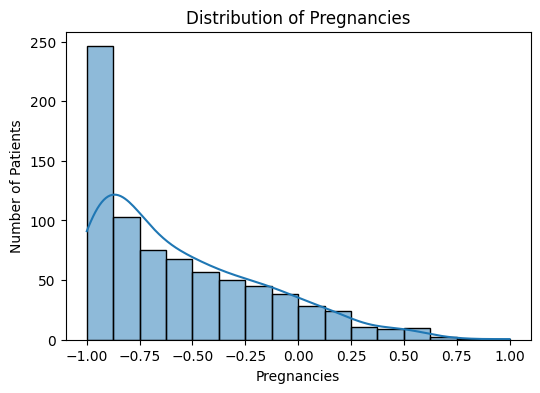

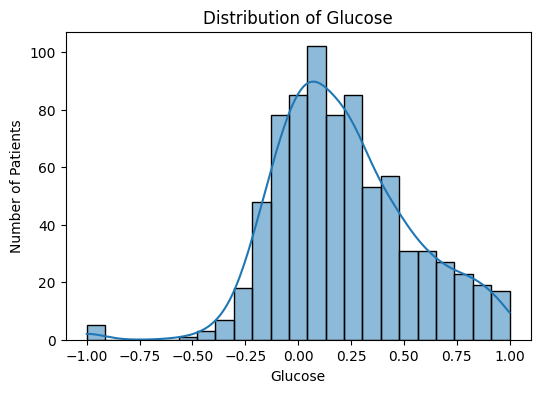

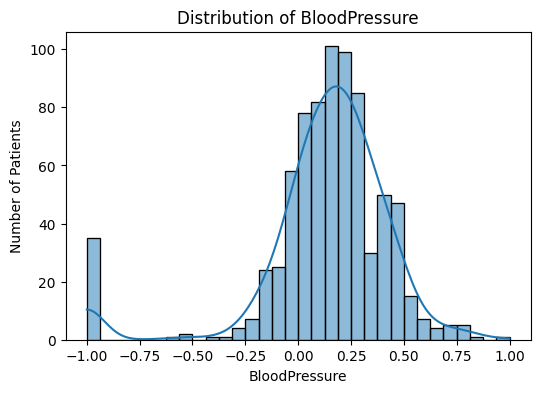

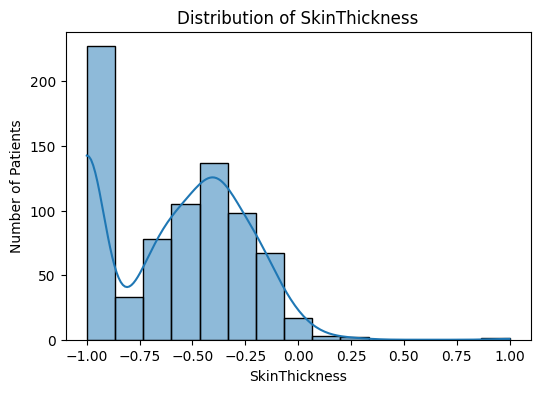

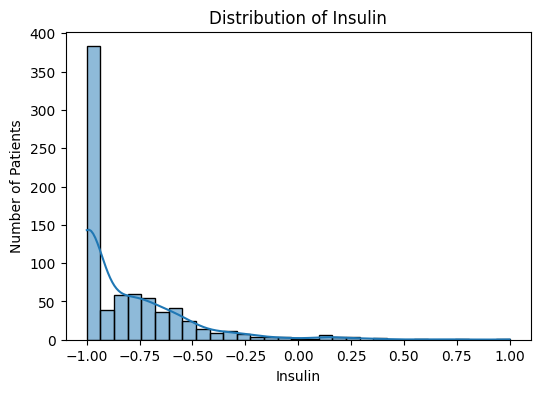

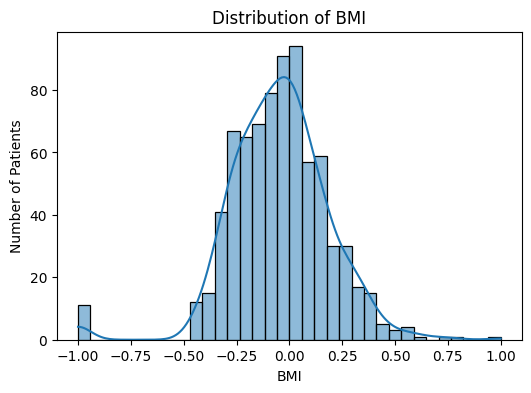

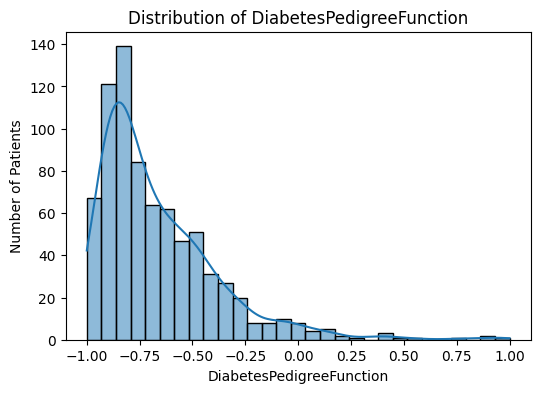

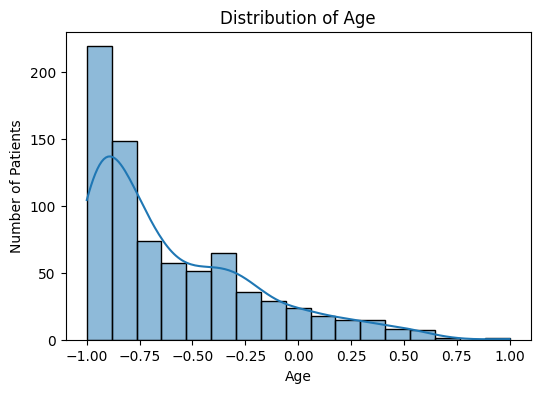

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot distribution for each column
for column in diabetic.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(diabetic[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Patients')
    plt.show()


# Identify outlier

In [29]:

import numpy as np
from scipy.stats import zscore

# calculate the z-score for each column
z_scores = np.abs(zscore(diabetic.iloc[:, :-1])) # exclude the outcome column


# Define a threshold for Z-score (usually 3 is used)
threshold = 3
outliers = np.where(z_scores > threshold)
# print("Outliers at positions:", outliers)



"""
for col in diabetic.columns[:-1]:  # Exclude the outcome column
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=diabetic[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

"""


"\nfor col in diabetic.columns[:-1]:  # Exclude the outcome column\n    plt.figure(figsize=(6, 4))\n    sns.boxplot(data=diabetic[col])\n    plt.title(f'Boxplot of {col}')\n    plt.xlabel(col)\n    plt.show()\n\n"

# check the correlation between each column and outcome


Pregnancies                -0.221898
Glucose                    -0.466581
BloodPressure              -0.065068
SkinThickness              -0.074752
Insulin                    -0.130548
BMI                        -0.292695
DiabetesPedigreeFunction   -0.173844
Age                        -0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


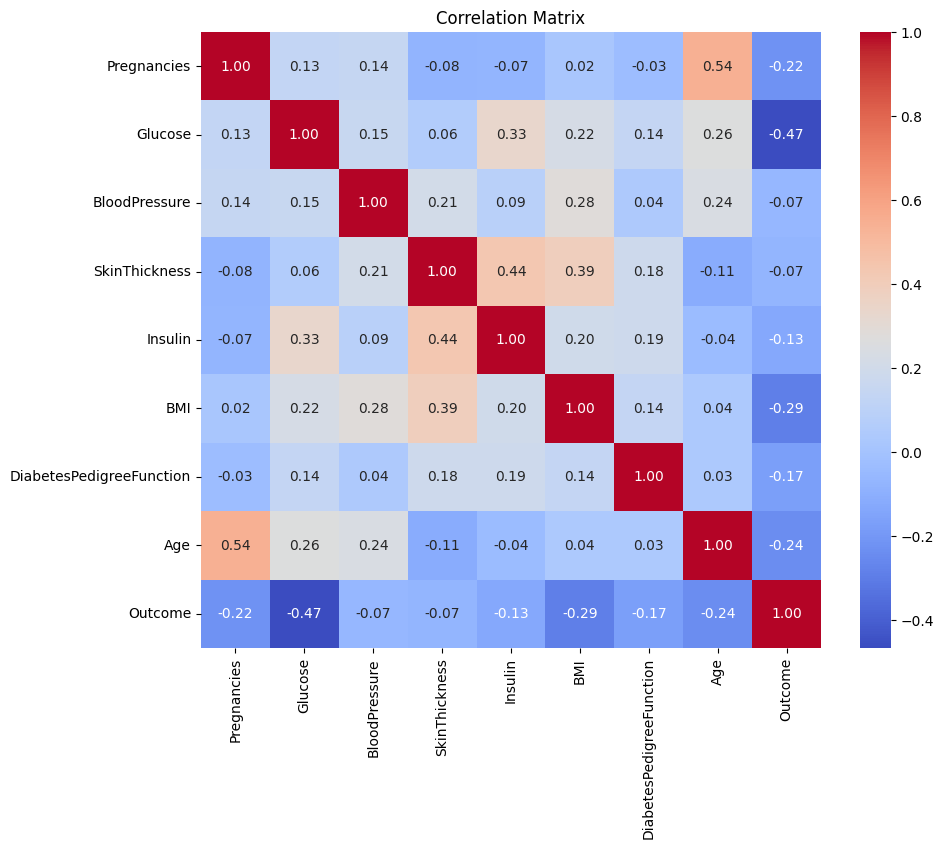

In [30]:
import pandas as pd

correlation_matrix = diabetic.corr()

outcome_correlation = correlation_matrix['Outcome'] 
print(outcome_correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Implementation Perceptron 

split the data


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'diabetic' is your DataFrame
X = diabetic.iloc[:, :-1]  # Features (all columns except 'Outcome')
y = diabetic['Outcome']     # Target (the outcome column)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Print the shapes to check the sizes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(614, 8) (154, 8) (614,) (154,)


Implement the Perceptron

In [32]:
from sklearn.linear_model import Perceptron

# Create a perceptron model
perceptron_model1 = Perceptron(max_iter=1000, random_state=42)

# Train the model
perceptron_model1.fit(X_train, y_train)



Perceptron(random_state=42)

In [33]:
perceptron_model2 = Perceptron(max_iter=1, random_state=42)
# Train the model
perceptron_model2.fit(X_train, y_train)

d:\miniconda3\envs\new_environment\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=1, random_state=42)

# Customized Perceptron


In [184]:
import numpy as np


class CustomPerceptron:

    def __init__(self, learning_rate = np.random.rand() * 0.4, weight = 0.5,bias = 0, max_iter=1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = weight
        self.bias = bias
        

    def fit(self, X, y):
        
        n_samples, n_features = X.shape


        #(1): initialize the weights with a constant value (for example, 0.5) for all features
        # Initialize weights with a constant value (for example, 0.5) for all features
        self.weights = np.full(n_features, self.weights, dtype=np.float64)
        # print(f"Initial weights: {self.weights}")

        #(2): initialize the weights with random numbers
        #set the weights by random number
        # self.weights = np.random.rand(n_features)
        # print(f"Initial weights: {self.weights}")



        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update weights
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update 
            
            
    def activation_function(self, x):
        # Custom activation function (e.g., step function)
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)
    



# Create a custom perceptron model
custom_model = CustomPerceptron(max_iter=1,learning_rate=0.28909927538840946, weight = 0.09416117303318872, bias = 0.610930774562709)
# Train the model
custom_model.fit(X_train.to_numpy(), y_train.to_numpy())









# find the optimized initial parameter and hyper parameter


In [187]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_list = []



# calculate the accuracy for each fold
for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # Train the model
    perceptron_model = CustomPerceptron(max_iter=1,learning_rate=0.28909927538840946, weight = 0.09416117303318872, bias = 0.610930774562709)
    perceptron_model.fit(X_train.to_numpy(), y_train.to_numpy())

    # Make predictions
    predictions = perceptron_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)

print("mean_accuracy: ", np.mean(accuracy_list))   
print("accuracy: ", accuracy_list) 



"""


# create stocahtic learning_rate_list 
learning_rate_list  = np.random.rand(20) * 0.5
# create stocahtic weight_list 
weight_list = np.random.rand(20)
# create stocahtic bias_list 
bias_list = np.random.rand(20)



# To store accuracy for each fold
accuracy_list = {}

for l_r_index, l_r in enumerate(learning_rate_list):
    for w_index, w in enumerate(weight_list):
        for b_index, b in enumerate(bias_list):
            # Initialize the accuracy list for each learning rate
            acu_list = []

            for train_index, test_index in kf.split(X):
                # Split the data
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                # Train the model
                perceptron_model = CustomPerceptron(learning_rate = l_r, weight = w, bias = b, max_iter=1)
                perceptron_model.fit(X_train.to_numpy(), y_train.to_numpy())

                # Make predictions
                predictions = perceptron_model.predict(X_test.to_numpy())

                # Calculate accuracy
                accuracy = accuracy_score(y_test, predictions)
                acu_list.append(accuracy)

            accuracy_list[f'{l_r_index},{w_index},{b_index}'] = np.mean(acu_list)

            # print(f"Learning rate: {l_r}, Weight: {w}, Bias: {b}, Accuracy: {np.mean(accuracy_list[l_r])}")
    
    print(f"step: {l_r_index}")


print(f"L_R_list: {learning_rate_list}")
print(f"W_list: {weight_list}")
print(f"B_list: {bias_list}")

# Calculate mean, max, and min accuracy
mean_accuracy = np.mean(list(accuracy_list.values()))
max_accuracy = np.max(list(accuracy_list.values()))
min_accuracy = np.min(list(accuracy_list.values()))

print("Mean Accuracy:", mean_accuracy)
print("Max Accuracy:", max_accuracy)
print("Min Accuracy:", min_accuracy)

# Find the key with the highest accuracy value
max_key = max(accuracy_list, key=accuracy_list.get)
print("Parameters with Max Accuracy:", max_key)

# print the parameters for the highest accuracy
print(f"Learning rate: {learning_rate_list[int(max_key.split(',')[0])]}, Weight: {weight_list[int(max_key.split(',')[1])]}, Bias: {bias_list[int(max_key.split(',')[2])]}")


"""



mean_accuracy:  0.7564892623716153
accuracy:  [0.7662337662337663, 0.7727272727272727, 0.7467532467532467, 0.7450980392156863, 0.7516339869281046]


Make Predictions

In [185]:

y_pred = custom_model.predict(X_test)

print(y_pred)
print(y_test)

print(y_pred.shape)
print(y_test.shape)

[ 1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1
 -1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1
  1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1
 -1 -1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1
  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
  1 -1  1 -1  1 -1 -1 -1  1]
1      1
4     -1
13    -1
14    -1
20     1
      ..
747    1
750   -1
756    1
761   -1
765    1
Name: Outcome, Length: 153, dtype: int64
(153,)
(153,)


measure the model


In [186]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("TP = ", conf_matrix[1,1])
print("TN = ", conf_matrix[0,0])
print("FP = ", conf_matrix[0,1])
print("FN = ", conf_matrix[1,0])
print('Confusion Matrix:\n', conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.75
TP =  68
TN =  47
FP =  11
FN =  27
Confusion Matrix:
 [[47 11]
 [27 68]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.64      0.81      0.71        58
           1       0.86      0.72      0.78        95

    accuracy                           0.75       153
   macro avg       0.75      0.76      0.75       153
weighted avg       0.78      0.75      0.76       153

